<h1>Part 1: Neighborhood Data</h1>

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests # library to handle requests


In [2]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [5]:
raw_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df_t = raw_data[0]
df_t

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


<h3>Checking the data on Wikipedia, we don't need to aggregate duplicate Postal Codes or set Neighborhoods to the Borough. We simply need to remove lines where Borough is 'Not assigned'</h3> 

In [6]:
#Cleaning data
df_t = df_t[df_t['Borough'] != 'Not assigned'].reset_index(drop = True)
df_t.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
#The shape of our data
print('The shape of the table is: ' + str(df_t.shape))

The shape of the table is: (103, 3)


<h1>Part 2: Adding Coordinates</h1>

In [8]:
#Will do so using the csv, as pandas allows easy joining.
df_geo = pd.read_csv('https://cocl.us/Geospatial_data')
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [9]:
#Join the two dataframes on the Postal code
df_full = df_t.merge(df_geo, on='Postal Code', validate='1:1')
df_full.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


<h1>Part 3: Segmenting Neighborhoods</h1>

The project considers limiting just to boroughs with Toronto in the name, but actually all the boroughs are part of Toronto now, so we'll keep that data. We'll do the same analysis on Toronto as we did with New York, just on a larger scale.

In [10]:
#Using function from Lab to assist
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h3>Get the venues using the Lab function</h3>

In [11]:
toronto_venues = getNearbyVenues(names=df_full['Neighborhood'],
                                   latitudes=df_full['Latitude'],
                                   longitudes=df_full['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [12]:
print(toronto_venues.shape)
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))
toronto_venues.head()

(2130, 7)
There are 272 unique categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


<h3>Here we do the one-hot encoding as step one of creating the features</h3>

In [13]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tcols = list(toronto_onehot.columns)
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']
tcols.remove('Neighborhood')
tcols.insert(0,'Neighborhood')
toronto_onehot = toronto_onehot[tcols]

toronto_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Next, we take the means for each neighborhood to create a single feature vector for each neighborhood</h3>

In [14]:
toronto_onehot.shape

(2130, 272)

In [15]:
neighboorhood_features = toronto_onehot.groupby('Neighborhood').mean().reset_index()
neighboorhood_features.head(5)

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
neighboorhood_features.shape

(95, 272)

<h3>It looks like we are missing a few neighborhoods, we'll add them as rows with all 0s</h3>

In [17]:
missing = set(df_full['Neighborhood']) - set(neighboorhood_features['Neighborhood'])
missing

{'Islington Avenue, Humber Valley Village',
 'Upper Rouge',
 'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale',
 'Willowdale, Newtonbrook'}

In [18]:
new_rows = list()
for m in missing:
    row = list()
    row.append(m)
    for i in range(0,271):
        row.append(0.0)
    new_rows.append(row)
new_df = pd.DataFrame(new_rows, columns=neighboorhood_features.columns)
new_df

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"West Deane Park, Princess Gardens, Martin Grov...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Islington Avenue, Humber Valley Village",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Upper Rouge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
neighboorhood_features_full = neighboorhood_features.append(new_df, ignore_index=True)
neighboorhood_features_full.shape

(99, 272)

<h3>Now, we get the most common venue. We'll limit it to five this time.</h3>

In [20]:
#We'll use the lab function help get the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighboorhood_features_full['Neighborhood']

for ind in np.arange(neighboorhood_features_full.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighboorhood_features_full.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Latin American Restaurant,Clothing Store,Lounge,Breakfast Spot,Skating Rink
1,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Pool,Pub
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Pizza Place,Supermarket,Sushi Restaurant
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Dog Run
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Juice Bar


<h3>We don't know the optimum k for kmeans, so we'll plot the interia and use the elbow method</h3>

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

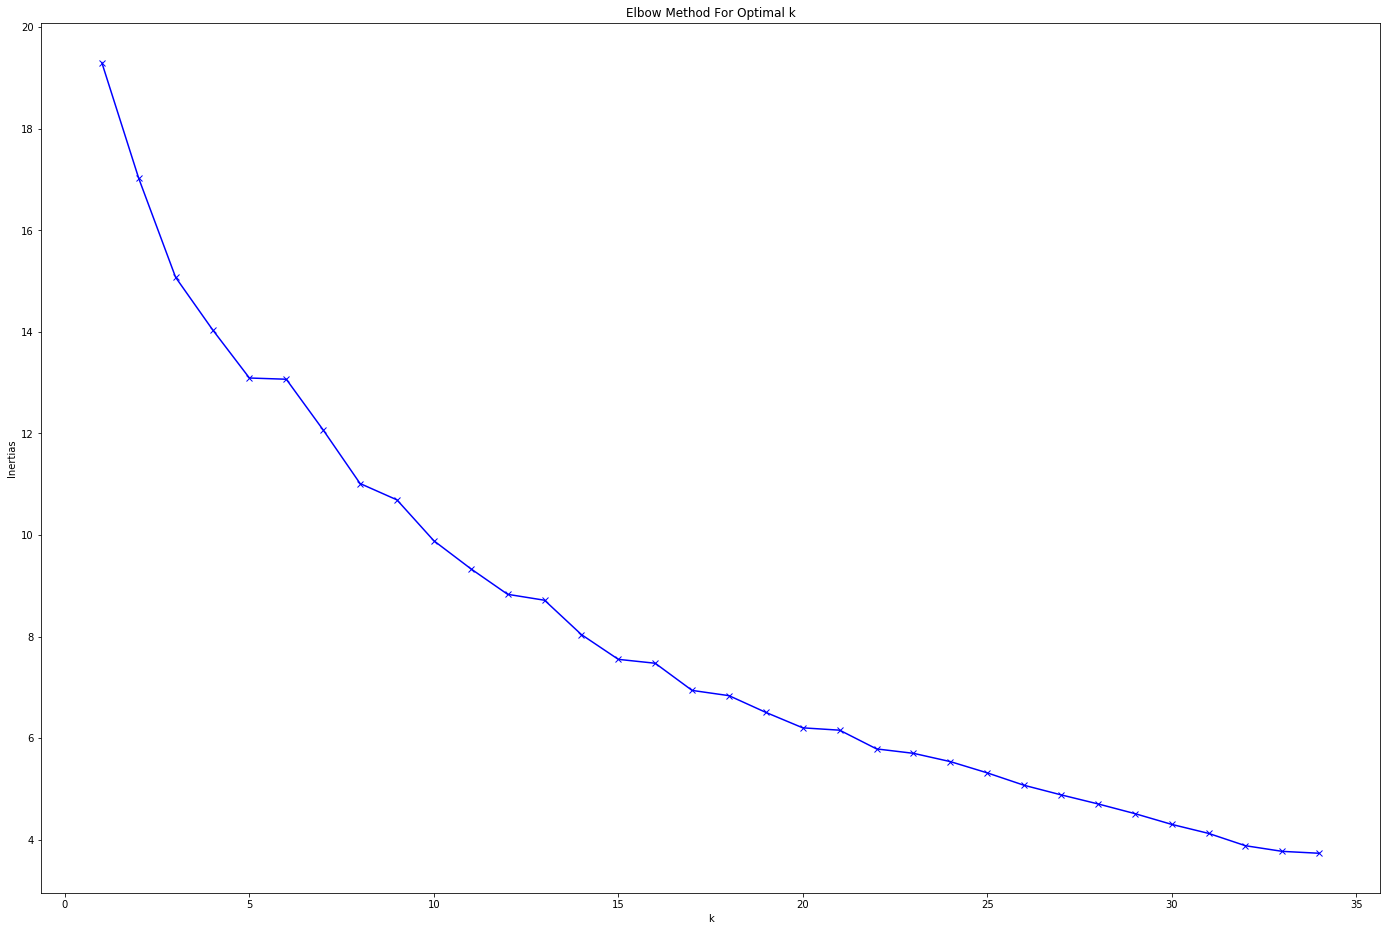

In [23]:
toronto_grouped_clustering = neighboorhood_features_full.drop('Neighborhood', 1)

kclusters = range(1,35)
inertias = []

for k in kclusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(24,16))
plt.plot(kclusters, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('Elbow Method For Optimal k') 
plt.show()

By the end, the inertia drop decreases. 15 looks like a good number

In [24]:
kmeans_opt = KMeans(n_clusters=15, random_state=0).fit(toronto_grouped_clustering)
kmeans_opt.labels_[0:100] 

array([ 1,  3,  3,  1,  3,  3,  3,  3,  1,  1,  8,  3,  1,  3,  3,  3,  1,
       10,  3,  3,  3,  3,  3,  1,  1,  1,  2,  3,  3,  3,  1,  3,  3,  1,
        1,  3,  1,  1,  6,  5,  1,  1,  3,  3,  1,  1,  1,  3,  3, 13,  0,
        1,  0,  1,  8,  3,  1,  3,  5,  3,  1,  8,  3,  3,  3,  0,  9,  7,
        3, 12, 12,  1,  3,  3,  1,  3,  3,  3,  3,  1,  3, 11,  3,  3,  3,
        3,  3,  2,  3,  3,  3, 14,  1,  2,  4,  1,  1,  1,  1],
      dtype=int32)

<h3>Merge labels with venue data</h3>

In [25]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_opt.labels_)

toronto_merged = df_full

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,8,Park,Construction & Landscaping,Food & Drink Shop,Department Store,Dessert Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,Coffee Shop,Pizza Place,Intersection,Hockey Arena,Portuguese Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Bakery,Pub,Park,Breakfast Spot
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1,Clothing Store,Accessories Store,Furniture / Home Store,Boutique,Miscellaneous Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3,Coffee Shop,Diner,Sushi Restaurant,Discount Store,Sandwich Place


<h3>Visualize</h3>

In [26]:
kclusters = 15

# create map
map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

It looks like all of the neighborhoods in Toronto proper belong to the same cluster (3) when clustered on venues. What are those venues? 

In [27]:
toronto_merged[toronto_merged['Cluster Labels'] == 3].head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,Coffee Shop,Pizza Place,Intersection,Hockey Arena,Portuguese Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Bakery,Pub,Park,Breakfast Spot
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3,Coffee Shop,Diner,Sushi Restaurant,Discount Store,Sandwich Place
7,M3B,North York,Don Mills,43.745906,-79.352188,3,Gym,Coffee Shop,Restaurant,Asian Restaurant,Japanese Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant
10,M6B,North York,Glencairn,43.709577,-79.445073,3,Italian Restaurant,Bakery,Asian Restaurant,Pub,Japanese Restaurant
13,M3C,North York,Don Mills,43.725900,-79.340923,3,Gym,Coffee Shop,Restaurant,Asian Restaurant,Japanese Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Coffee Shop,Café,Gastropub,Restaurant,Cocktail Bar
17,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201,3,Coffee Shop,Shopping Plaza,Beer Store,Pet Store,Pharmacy
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Cheese Shop


It looks like cluster 3 is regions with a lot of Coffee Shops or Cafes.